In [1]:
!wget https://www.ddg-pharmfac.net/AllerTOP/reduced_all_allergens.fasta
!wget https://www.ddg-pharmfac.net/AllerTOP/reduced_all_nonallergens.fasta

--2022-08-28 07:17:05--  https://www.ddg-pharmfac.net/AllerTOP/reduced_all_allergens.fasta
Resolving www.ddg-pharmfac.net (www.ddg-pharmfac.net)... 193.107.36.33
Connecting to www.ddg-pharmfac.net (www.ddg-pharmfac.net)|193.107.36.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 807293 (788K)
Saving to: ‘reduced_all_allergens.fasta’

reduced_all_allerge 100%[===================>] 788.37K   909KB/s    in 0.9s    

2022-08-28 07:17:07 (909 KB/s) - ‘reduced_all_allergens.fasta’ saved [807293/807293]

--2022-08-28 07:17:07--  https://www.ddg-pharmfac.net/AllerTOP/reduced_all_nonallergens.fasta
Resolving www.ddg-pharmfac.net (www.ddg-pharmfac.net)... 193.107.36.33
Connecting to www.ddg-pharmfac.net (www.ddg-pharmfac.net)|193.107.36.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1445522 (1.4M)
Saving to: ‘reduced_all_nonallergens.fasta’

reduced_all_nonalle 100%[===================>]   1.38M  1.14MB/s    in 1.2s    

2022-08-28 07:17:

In [2]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 7.7 MB/s 


In [ ]:
from Bio import SeqIO

for seq_record in SeqIO.parse("/content/reduced_all_allergens.fasta", "fasta"):
  print(seq_record.seq)

In [6]:
import pandas as pd

allergen = pd.DataFrame()
nonallergen = pd.DataFrame()

In [7]:
atr = ['id','seq','label']
for i in atr:
  allergen[i] = ""
  nonallergen[i] = ""

In [18]:
allergen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      0 non-null      object
 1   seq     0 non-null      object
 2   label   0 non-null      object
dtypes: object(3)
memory usage: 108.0+ bytes


In [20]:
from Bio import SeqIO

j = 0
for seq_record in SeqIO.parse("/content/reduced_all_allergens.fasta", "fasta"):
  gid = str(seq_record.id)
  gseq = str(seq_record.seq)
  label = 'allergen'
  atrr = [gid,gseq,label]
  allergen.loc[len(allergen.index)] = atrr
  j += 1

In [22]:
from Bio import SeqIO

k = 0
for seq_record in SeqIO.parse("/content/reduced_all_nonallergens.fasta", "fasta"):
  gid = str(seq_record.id)
  gseq = str(seq_record.seq)
  label = 'nonallergen'
  atrr = [gid,gseq,label]
  nonallergen.loc[len(nonallergen.index)] = atrr
  k += 1

In [23]:
nonallergen.head()

,id,seq,label
0,sp|P50579|AMPM2_HUMAN,MAGVEEVAASGSHLNGDLDPDDREEGAASTAEEAAKKKRRKKKKSK...,nonallergen
1,sp|P15144|AMPN_HUMAN,MAKGFYISKSLGILGILLGVAAVCTIIALSVVYSQEKNKNANSSPV...,nonallergen
2,sp|Q8N6M6|AMPO_HUMAN,MDIQLDPARDDLPLMANTSHILVKHYVLDLDVDFESQVIEGTIVLF...,nonallergen
3,sp|Q6Q4G3|AMPQ_HUMAN,MGPPSSSGFYVSRAVALLLAGLVAALLLALAVLAALYGHCERVPPS...,nonallergen
4,sp|Q9C0C7|AMRA1_HUMAN,MKVVPEKNAVRILWGRERGARAMGAQRLLQELVEDKTRWMKWEGKR...,nonallergen


In [24]:
df = [allergen,nonallergen]
df_con = pd.concat(df)

In [25]:
df_con = df_con.sample(frac=1)
df_con = df_con.reset_index()
del df_con['index']

In [26]:
df_con.head()

,id,seq,label
0,sp|P24846|DAPA1_WHEAT,MPYLQPPRPHPHPHPTSRLSRASPPSPFPFFPAGTSRSGRLQPVPV...,nonallergen
1,sp|O75882|ATRN_HUMAN,MVAAAAATEARLRRRTAATAALAGRSGGPHWDWDVTRAGRPGLGAG...,nonallergen
2,tr|Q0JIK5|Q0JIK5_ORYSJ,MAFHFSSRLFSSCLLFSFCLMLIRAHGSRRLYIAYLGEKKHDDPTL...,nonallergen
3,sp|Q68CP9|ARID2_HUMAN,MANSTGKAPPDERRKGLAFLDELRQFHHSRGSPFKKIPAVGGKELD...,nonallergen
4,gi|4376217|emb|CAA04824.1|,GVFNYEIETTSVIPAARLFKAFILDGDNLVPKVAPQAISSVENIEG...,allergen


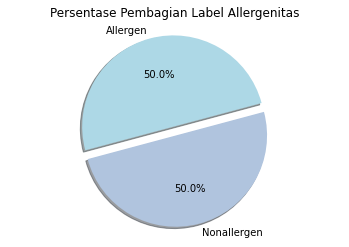

In [27]:
import matplotlib.pyplot as plt

Tasks = [len(df_con[df_con['label']=='allergen']),len(df_con[df_con['label']=='nonallergen'])]

my_labels = ['Allergen','Nonallergen']
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Persentase Pembagian Label Allergenitas')
plt.axis('equal')
plt.show()

In [28]:
df_con.to_csv('/content/DatasetAllergenicityResult.csv')